In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pyarrow.parquet as pq
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

dataset_path = '/kaggle/input/asl-signs/train_landmark_files'
dataset_files = os.listdir(dataset_path)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
file_paths_dict = {}
dataset_files

['36257',
 '25571',
 '55372',
 '26734',
 '16069',
 '53618',
 '27610',
 '32319',
 '49445',
 '28656',
 '4718',
 '2044',
 '37055',
 '22343',
 '34503',
 '29302',
 '37779',
 '62590',
 '18796',
 '30680',
 '61333']

In [8]:
for digit in dataset_files:
    # Chemin complet du répertoire du chiffre
    digit_path = os.path.join(dataset_path, digit)
    # Listes des fichiers dans le répertoire du chiffre
    digit_files = os.listdir(digit_path)
    # Chemins complets des sous-fichiers pour le chiffre
    digit_file_paths = [os.path.join(digit_path, file) for file in digit_files]
    # Stocker les chemins complets des sous-fichiers dans le dictionnaire
    file_paths_dict[digit] = digit_file_paths
    # print(file_paths_dict[digit])

In [9]:
print(file_paths_dict['16069'][0])

/kaggle/input/asl-signs/train_landmark_files/16069/2285328250.parquet


In [24]:
print(file_paths_dict['16069'][0])

/kaggle/input/asl-signs/train_landmark_files/16069/2285328250.parquet


In [28]:
metadata_table_test = pq.read_metadata(file_paths_dict['16069'][0])
print(metadata_table_test)
first_img=pq.read_table(file_paths_dict['16069'][0]).to_pandas()

  created_by: parquet-cpp-arrow version 8.0.0
  num_columns: 7
  num_rows: 11946
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 3629


In [73]:
print(file_paths_dict['16069'][0])

/kaggle/input/asl-signs/train_landmark_files/16069/2285328250.parquet


In [86]:
frame_landmarks=first_img[(first_img['frame']==26) & (first_img['x'].notna())]
frame_landmarks

,frame,row_id,type,landmark_index,x,y,z
543,26,26-face-0,face,0,0.520264,0.457605,-0.043453
544,26,26-face-1,face,1,0.525217,0.420029,-0.054068
545,26,26-face-2,face,2,0.518904,0.433807,-0.035318
546,26,26-face-3,face,3,0.509013,0.397074,-0.033711
547,26,26-face-4,face,4,0.525008,0.411245,-0.054446
...,...,...,...,...,...,...,...
1060,26,26-pose-28,pose,28,0.498706,2.133514,0.816352
1061,26,26-pose-29,pose,29,0.844669,2.179330,1.147984
1062,26,26-pose-30,pose,30,0.489545,2.200501,0.869543
1063,26,26-pose-31,pose,31,0.846634,2.254895,0.351191


In [87]:
print(frame_landmarks['x'].max(),frame_landmarks['x'].min(),frame_landmarks['y'].max(),frame_landmarks['y'].min())

1.0894414186477661 0.043471235781908035 2.262134075164795 0.3157239556312561


In [88]:
x_max=frame_landmarks['x'].max()
y_max=frame_landmarks['y'].max()
img=np.zeros((512,512))
coordinates= frame_landmarks[['x','y']]
int_coords= coordinates[["x","y"]]
int_coords['x'] = coordinates['x'].apply(lambda x : round(x*511/x_max))
int_coords['y'] = coordinates['y'].apply(lambda x : round(x*511/y_max))
int_coords

,x,y
543,244,103
544,246,95
545,243,98
546,239,90
547,246,93
...,...,...
1060,234,482
1061,396,492
1062,230,497
1063,397,509


In [117]:
import matplotlib.pyplot as plt 
for i in range(len(int_coords)): 
    img[int_coords['x'][i],int_coords['y'][i]]=1


KeyError: 0

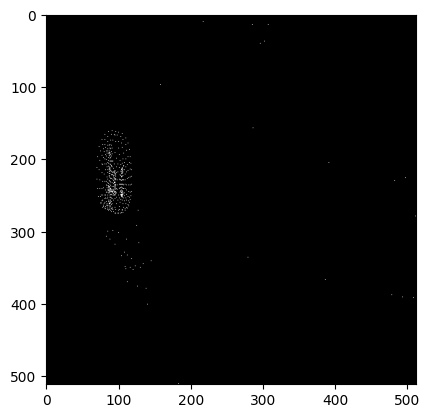

In [72]:
plt.imshow(img,'gray')

In [85]:
frame_values=first_img['frame'].unique()
print(frame_values)

[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [121]:
def show_img(path,frame_id):
    
    image=pq.read_table(path).to_pandas()
    frame_values=image['frame'].unique()
    if frame_id < len(frame_values) - 1 :
        frame_landmarks=image[(image['frame']==frame_values[frame_id]) & (image['x'].notna())].reset_index(drop=True)
    else : 
        print('frame index out of bounds')
        return 
    x_max=frame_landmarks['x'].max()
    y_max=frame_landmarks['y'].max()
    img=np.zeros((512,512))
    coordinates= frame_landmarks[['x','y']]
    int_coords= coordinates[["x","y"]]
    int_coords['x'] = coordinates['x'].apply(lambda x : round(x*511/x_max))
    int_coords['y'] = coordinates['y'].apply(lambda x : round(x*511/y_max))
    for i in range(len(int_coords)): 
        img[int_coords['x'][i],int_coords['y'][i]]=1
    plt.imshow(img,'gray')
    plt.show()
    return img

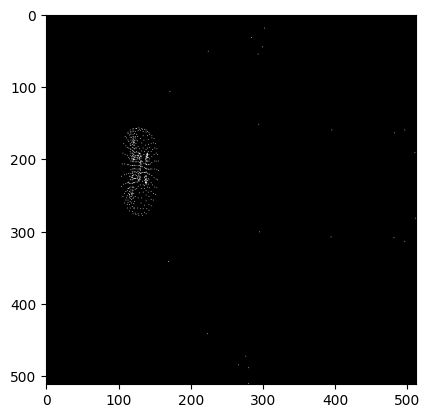

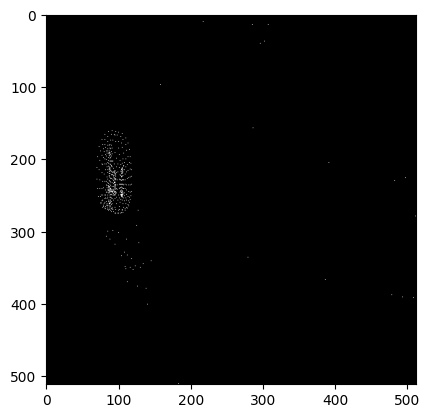

In [122]:
img1=show_img(file_paths_dict['62590'][2000],0)
img1=show_img(file_paths_dict['16069'][0],0)

In [108]:
np.array_equal(img1,img2)

False